In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# from env_template_old import  OurAwesomeEnv

In [2]:
import gymnasium as gym
from gymnasium import spaces
from typing import Optional
import numpy as np
import cv2
from scipy import signal
import random

import imageio
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from implementation import SoftmaxPolicy, Qlearning, DynaQ
from utils import evaluate_agent, record_video
from environment import OurAwesomeEnv


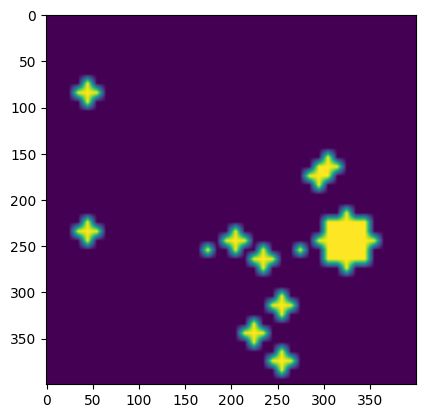

In [62]:
env = OurAwesomeEnv()
env.state = (25, 22, 2)
plt.imshow(env.render())

In [9]:
# Training parameters
n_training_episodes = 3000  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
n_eval_episodes = 100       # Total number of test episodes

# Environment parameters
env_id = "FrozenLake-v1"     # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.99                 # Discounting rate
eval_seed = []               # The evaluation seed of the environment

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob

In [10]:
policy = SoftmaxPolicy()
qlearning = Qlearning(env, policy)
Q_table = qlearning.train(n_training_episodes, max_steps, learning_rate, gamma)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [13]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Q_table, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

  0%|          | 0/10 [00:00<?, ?it/s]

IndexError: index 40 is out of bounds for axis 1 with size 40

In [118]:
record_video(env, Q_table, 'Q-learning.mp4')